In [3]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
survey = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Preview DF
survey.head(n = 10)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2
5,7,9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,4,4,4,4,4,3,4,4,2,4,4,4,6,1,6,1,3,2,5,2,6,3,3,2,1,2,2,2,3,6,1,2,2,1,3,1,1,5,5,3,6,4,5,5,5,6,4,4,4,2,2,3,4,4,0,0,0,1,1,1,2,8,1
6,8,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,4,5,1,4,2,1,4,2,4,4,4,2,2,1,4,1,3,3,3,1,1,1,6,1,1,1,2,2,2,1,1,6,1,4,3,3,3,3,2,1,2,3,1,3,1,2,2,3,2,2,2,2,2,1,3,1,0,0,0,0,1,1,2,8,2
7,9,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,5,5,2,4,2,4,4,2,4,4,2,4,4,4,6,1,1,4,2,1,1,1,6,2,2,1,1,1,1,1,2,5,1,1,1,1,2,4,2,1,3,3,1,3,3,2,4,4,2,4,4,2,4,1,4,1,0,0,0,1,1,1,2,11,2
8,10,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,4,6,2,4,3,3,4,2,4,4,4,4,2,3,5,2,4,6,3,3,1,1,5,1,4,2,3,3,3,2,3,5,2,4,3,4,5,4,3,3,4,3,3,3,4,2,3,6,4,2,3,3,2,1,6,2,1,0,0,0,0,1,2,10,1
9,11,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,3,6,2,4,4,4,4,3,4,4,4,4,4,4,3,2,4,3,5,3,1,3,5,3,3,3,2,2,3,2,2,5,2,2,3,2,2,3,2,2,3,2,3,2,5,2,3,5,4,4,2,2,3,3,5,2,1,0,0,0,0,1,2,9,2


In [ ]:
survey.info()

<h4>User-Defined Functions</h4>
<p>Run the following code to load the user-defined functions used throughout this Notebook.</p>

In [4]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<strong>Run the following code to generate histograms for each of the features in the dataset.<strong>

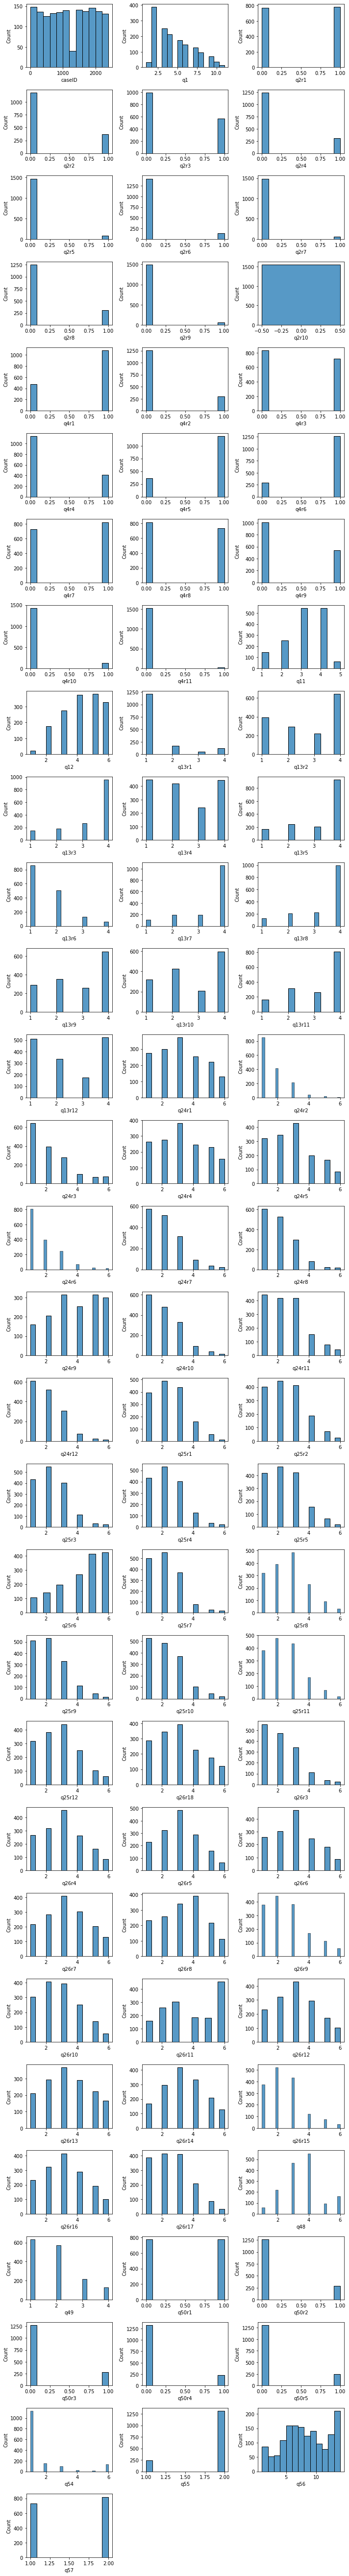

In [26]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 80))


# initializing a counter
count = 0


# looping to create visualizations
for col in survey:

    # condition to break
    if count == 88:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(33, 3, count)
    sns.histplot(x = survey[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
#plt.savefig('./__analysis_images/customers_df_histograms.png')
plt.show()

In [ ]:
# looping to logarithmically transform non-demographic features
for col in customers_df:
    if col != "Channel" and col != "Region":
        customers_df['log_' + col] = np.log(customers_df[col])

# checking results
customers_df.columns

In [ ]:
# scaling (normalizing) variables before correlation analysis

# dropping demographic information
survey_behavior = survey.drop('caseID', axis = 1)


# applying the unsupervised_scaler function
survey_scaled = unsupervised_scaler(df = survey_behavior)


# checking pre- and post-scaling variance
print(np.var(survey_behavior), '\n\n')
print(np.var(survey_scaled))